# Title: Customer Churn Modelling
## Python Notebook to do PCA on unsupervised data to categorise the countries using socio-economic and health factors that determine the overall development of the country.

### Dataset details can be found here: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data# 

In [34]:
import sys
import os
import copy
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from eda_helper import EDAHelper
from preprocess_helper import PreprocessingHelper
from feature_selection_helper import FeatureSelection
from training_helper import TrainingHelper
from prediction_helper import PredictionHelper

# Exploratory Data Analysis

In [35]:
# read dataset in a dataframe
df = pd.read_csv("../Data/Country-data.csv")
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [36]:
# take copy of original dataframe
df_copy = copy.deepcopy(df)

In [37]:
# perform EDA on dataframe
eda = EDAHelper(df=df)

In [38]:
eda.get_all_columns()

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [39]:
eda.get_null_count()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [40]:
eda.get_unique_count()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [41]:
eda.get_numerical_columns()

child_mort  exports  health   imports  income  inflation  life_expec  \
0          90.2   10.000    7.58   44.9000    1610      9.440        56.2   
1          16.6   28.000    6.55   48.6000    9930      4.490        76.3   
2          27.3   38.400    4.17   31.4000   12900     16.100        76.5   
3         119.0   62.300    2.85   42.9000    5900     22.400        60.1   
4          10.3   45.500    6.03   58.9000   19100      1.440        76.8   
5          14.5   18.900    8.10   16.0000   18700     20.900        75.8   
6          18.1   20.800    4.40   45.3000    6700      7.770        73.3   
7           4.8   19.800    8.73   20.9000   41400      1.160        82.0   
8           4.3   51.300   11.00   47.8000   43200      0.873        80.5   
9          39.2   54.300    5.88   20.7000   16000     13.800        69.1   
10         13.8   35.000    7.89   43.7000   22900     -0.393        73.8   
11          8.6   69.500    4.97   50.9000   41100      7.440        76.0   
12         49.4   16.000    3.52   21.8000    2440      7.140        70.4   
13         14.2   39.500    7.97   48.7000   15300      0.321        76.7   
14          5.5   51.400    5.61   64.5000   16200     15.100        70.4   
15          4.5   76.400   10.70   74.7000   41100      1.880        80.0   
16         18.8   58.200    5.20   57.5000    7880      1.140        71.4   
17        111.0   23.800    4.10   37.2000    1820      0.885        61.8   
18         42.7   42.500    5.20   70.7000    6420      5.990        72.1   
19         46.6   41.200    4.84   34.3000    5410      8.780        71.6   
20          6.9   29.700   11.10   51.3000    9720      1.400        76.8   
21         52.5   43.600    8.30   51.3000   13300      8.920        57.1   
22         19.8   10.700    9.01   11.8000   14500      8.410        74.2   
23         10.5   67.400    2.84   28.0000   80600     16.700        77.1   
24         10.8   50.200    6.87   53.0000   15300      1.110        73.9   
25        116.0   19.200    6.74   29.6000    1430      6.810        57.9   
26         93.6    8.920   11.60   39.2000     764     12.300        57.7   
27         44.4   54.100    5.68   59.5000    2520      3.120        66.1   
28        108.0   22.200    5.13   27.0000    2660      1.910        57.3   
29          5.6   29.100   11.30   31.0000   40700      2.870        81.3   
30         26.5   32.700    4.09   61.8000    5830      0.505        72.5   
31        149.0   11.800    3.98   26.5000     888      2.010        47.5   
32        150.0   36.800    4.53   43.5000    1930      6.390        56.5   
33          8.7   37.700    7.96   31.3000   19400      8.960        79.1   
34         15.7   26.300    5.07   22.6000    9530      6.940        74.6   
35         18.6   15.900    7.59   17.8000   10900      3.860        76.4   
36         88.2   16.500    4.51   51.7000    1410      3.870        65.9   
37        116.0   41.100    7.91   49.6000     609     20.800        57.5   
38         63.9   85.100    2.46   54.7000    5190     20.700        60.4   
39         10.2   33.200   10.90   35.0000   13000      6.570        80.4   
40        111.0   50.600    5.30   43.3000    2690      5.390        56.3   
41          5.5   37.600    7.76   38.1000   20100      0.821        76.3   
42          3.6   50.200    5.97   57.5000   33900      2.010        79.9   
43          3.4   66.000    7.88   62.9000   28300     -1.430        77.5   
44          4.1   50.500   11.40   43.6000   44000      3.220        79.5   
45         34.4   22.700    6.22   33.3000   11100      5.440        74.6   
46         25.1   27.900    8.06   32.4000    9350      7.470        76.7   
47         29.1   21.300    4.66   26.6000    9860     10.100        70.5   
48         19.2   26.900    6.91   46.6000    7300      2.650        74.1   
49        111.0   85.800    4.48   58.9000   33700     24.900        60.9   
50         55.2    4.790    2.66   23.3000    1420     11.600        61.7   
5

In [42]:
eda.describe_column()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [43]:
eda.show_outlier_details()

Column               Outlier Range  No. Outliers Present
0  child_mort                (8.25, 62.1)                     4
1     exports  (23.8, 51.349999999999994)                     5
2      health   (4.92, 8.600000000000001)                     2
3     imports               (30.2, 58.75)                     4
4      income           (3355.0, 22800.0)                     8
5   inflation               (1.81, 10.75)                     5
6  life_expec                (65.3, 76.8)                     3
7   total_fer               (1.795, 3.88)                     1
8        gdpp           (1330.0, 14050.0)                    25

In [44]:
eda.perform_pearson_correlation()

child_mort  exports       0.318093
            health        0.200402
            imports       0.127211
            income        0.524315
            inflation     0.288276
            life_expec    0.886676
            total_fer     0.848478
            gdpp          0.483032
exports     health        0.114408
            imports       0.737381
            income        0.516784
            inflation     0.107294
            life_expec    0.316313
            total_fer     0.320011
            gdpp          0.418725
health      imports       0.095717
            income        0.129579
            inflation     0.255376
            life_expec    0.210692
            total_fer     0.196674
            gdpp          0.345966
imports     income        0.122406
            inflation     0.246994
            life_expec    0.054391
            total_fer     0.159048
            gdpp          0.115498
income      inflation     0.147756
            life_expec    0.611962
            total_fe

In [45]:
eda.top_pearson_correlation()

income      gdpp          0.895571
child_mort  life_expec    0.886676
            total_fer     0.848478
life_expec  total_fer     0.760875
exports     imports       0.737381
income      life_expec    0.611962
life_expec  gdpp          0.600089
child_mort  income        0.524315
exports     income        0.516784
income      total_fer     0.501840
dtype: float64

In [46]:
eda.get_columns_with_zero_std_deviation()

'No Columns with Zero Standard Deviation'

In [47]:
eda.get_all_columns()

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

# Data Preprocessing

In [48]:
binary_columns = ['Gender']
categorical_columns = ['country']
numerical_columns = ['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']
label = 'Attrition_Flag'

In [49]:
preprocess = PreprocessingHelper() #Instantiate the object for PreprocessingHelper Class

In [50]:
#Removing Duplicates here
df = preprocess.remove_duplicates(df)
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [51]:
#Getting all Null Data Columns
df_with_null, cols = preprocess.get_null_data_points(df)
cols

[]

In [52]:
df = preprocess.replace_null_values(df)
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [53]:
#df = preprocess.labelencode_categorical_columns(df=df, columns=binary_columns)
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [54]:
#df = preprocess.labelencode_categorical_columns(df=df, columns=[label])
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [55]:
df = preprocess.labelencode_categorical_columns(df=df, columns=categorical_columns)
df.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  country  
0       5.82    553        0  
1       1.65   4090        1  
2       2.89   4460        2  
3       6.16   3530        3  
4       2.13  12200        4

In [56]:
#df = preprocess.remove_columns(df,['CLIENTNUM'])
df.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  country  
0       5.82    553        0  
1       1.65   4090        1  
2       2.89   4460        2  
3       6.16   3530        3  
4       2.13  12200        4

In [57]:
scale_col1 = ['XXX', 'XXX', 'XXX', 'XXX'] 
df = preprocess.scale_columns(df=df, columns=df.columns, scaler_type='std')
df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp   country  
0   1.902882 -0.679180 -1.721710  
1  -0.859973 -0.485623 -1.700967  
2  -0.038404 -0.465376 -1.680223  
3   2.128151 -0.516268 -1.659480  
4  -0.541946 -0.041817 -1.638736

In [58]:
'''scale_col2 = ['XXX', 'XXX', 'XXX'] 
df = preprocess.scale_columns(df=df, columns=scale_col2, scaler_type='minmax')
df.head()'''

"scale_col2 = ['XXX', 'XXX', 'XXX'] \ndf = preprocess.scale_columns(df=df, columns=scale_col2, scaler_type='minmax')\ndf.head()"

# Dimension Reduction

In [59]:
df.shape

(167, 10)

In [60]:
from dimension_reduction_helper import dimensionReduction

In [61]:
dr = dimensionReduction(df)

Need only 2 components or Label Details to visualize the separation observation


0         1
0   -2.958742 -0.069228
1    0.382716 -0.764844
2   -0.330796 -0.608983
3   -2.975090  1.548361
4    0.988175 -0.040027
5   -0.021499 -1.909849
6   -0.145772 -0.730838
7    2.296952 -2.144030
8    2.929980 -0.894607
9   -0.223347 -0.546690
10   1.226126 -0.818355
11   1.630042  0.409332
12  -1.164975 -1.110526
13   1.040677 -0.638721
14   0.541771  0.398029
15   3.104969  0.513357
16   0.173108  0.544253
17  -2.709731  0.268537
18  -0.193188  0.631183
19  -0.830108 -0.252561
20   0.959319 -1.110027
21  -0.916388  0.329232
22   0.105099 -2.266760
23   2.425822 -0.090357
24   0.872439 -0.106037
25  -3.154194 -0.079400
26  -2.929565 -0.522794
27  -0.613913  0.764190
28  -2.839101 -0.044031
29   2.511402 -1.835003
30  -0.186377  0.223687
31  -3.994335  0.266831
32  -3.585248  1.177748
33   0.922689 -1.173556
34   0.028622 -1.291649
35   0.092536 -1.868079
36  -2.120014  0.237222
37  -3.196566  0.977522
38  -1.748543  2.095338
39   0.912230 -1.436822
40  -2.605112  1.110846
41   1.123776 -0.940723
42   2.150100 -0.100760
43   2.029736  0.322301
44   2.987264 -0.944424
45  -0.253412 -0.961067
46  -0.011832 -1.117833
47  -0.868815 -0.887656
48   0.061303 -0.648620
49  -1.309731  2.314323
50  -2.493127 -0.677245
51   1.640652  0.938267
52  -0.206061  0.994142
53   2.440297 -1.142516
54   2.236145 -1.924100
55  -1.436671  0.276002
56  -2.228512  0.164030
57   0.307314 -0.569664
58   2.655679 -1.327594
59  -2.066398  0.342692
60   1.764664 -1.815384
61   0.132088 -0.489518
62  -0.675744 -0.658723
63  -2.979200  0.698372
64  -2.844078 -0.135355
65  -0.332306  1.310583
66  -4.418237  1.688235
67   1.830032  1.221974
68   2.471570 -0.662782
69  -1.351180 -0.564204
70  -0.962241 -0.747822
71  -0.008234 -1.342482
72  -1.034147 -0.284696
73   3.662538  1.686001
74   1.478924 -1.069188
75   2.159205 -1.791507
76   0.014464 -0.253203
77   2.259711 -2.450722
78   0.158098  0.530738
79  -0.294922 -0.226337
80  -1.876712 -0.185506
81  -1.239685  0.354533
82   2.464326  0.094219
83  -0.338760  1.293484
84  -1.526847  0.543455
85   1.188974  0.148072
86   1.172596 -0.264929
87  -1.799089  2.029626
88  -1.769094  1.058399
89   0.822612  0.409856
90   1.413433  0.729534
91   6.923394  4.843320
92   0.737577 -0.089253
93  -2.129742  0.363478
94  -2.972374  0.248800
95   1.238083  1.615685
96   1.115870  1.020951
97  -3.403759  0.585314
98   3.690091  4.764717
99  -1.942891  1.427667
100  0.908717  0.434687
101 -0.369852  0.135543
102  0.521119  0.202732
103 -0.930413  0.618037
104  1.037940 -0.224886
105 -0.221377 -0.248773
106 -2.906411  0.938662
107 -1.825173 -1.563934
108 -1.028666  1.043262
109 -1.292203 -0.723663
110  3.393641  0.164476
111  1.830161 -1.522613
112 -3.432773  1.022599
113 -4.885900  0.128921
114  3.736949 -1.372246
115  1.145844  0.569735
116 -2.341947 -0.407527
117  1.183228  1.171243
118  0.137624  0.427037
119 -0.001366 -1.012705
120 -0.762324 -0.027686
121  1.238085 -0.589595
122  1.834560 -1.374197
123  4.263017 -0.105442
124  0.594862 -0.560006
125  0.187088 -0.966526
126 -1.655545 -0.912186
127 -0.538085  0.061591
128  0.881687 -0.071504
129 -1.886135  0.178854
130  0.858473 -0.772578
131  1.629877  3.000307
132 -3.352108 -0.114150
133  5.813481  6.739534
134  2.058317  1.137672
135  2.307989  0.287759
136 -0.774701  1.408307
137 -1.161376 -0.443998
138  1.947932 -0.321258
139  2.048775 -1.671883
140 -0.542943 -0.854657
141  0.058849  0.093790
142 -2.285007 -0.621721
143  0.205463  0.028579
144  2.851252 -0.791104
145  4.122095 -0.305775
146 -1.208186  0.107081
147 -2.517162 -0.075255
148  0.962392  0.946993
149 -2.332560 -0.996994
150 -1.959135  1.083644
151 -0.716630  0.046465
152  0.640790  0.305770
153  0.439886 -1.263221
154 -0.424088  1.419389
155 -2.812902 -0.189202
156  0.343996  0.059743
157  2.469158  1.307599
158  2.108669 -1.380250
159  2.682310 -2.826503
160  0.659707 -1.269113
161 -0.809101 -0.478801
162 -0.775815  0.791185
163 -0.503341 -1.000980
164  0.545452  1.554582
165 -1.839362  0.088454
166 

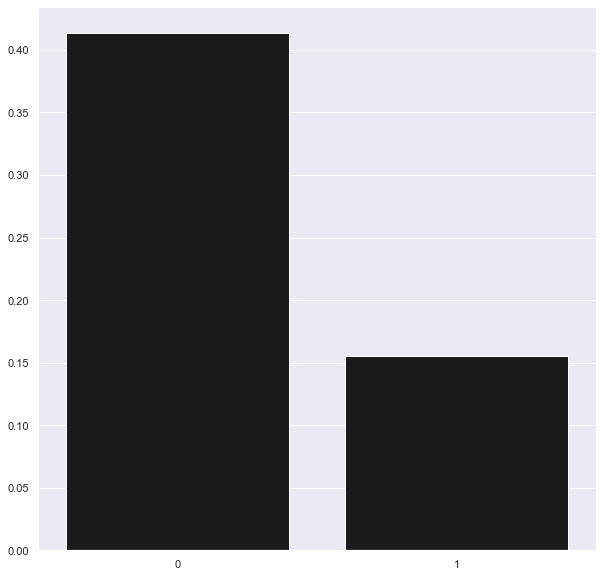

In [62]:
dr.pca(df,Variance_bar ='yes',n_components=2)

Need only 2 components or Label Details to visualize the separation observation


0         1         2         3         4         5         6
0   -2.958881 -0.067647 -1.056178 -0.475596 -1.642717  0.315411  0.291164
1    0.382558 -0.763070 -0.753050 -1.807450  0.087464  0.610541 -0.023819
2   -0.330920 -0.607027  0.773837 -1.947951 -0.309290  0.631778  0.457160
3   -2.975263  1.550567  1.060749 -1.190650 -1.860800  0.289911  0.604535
4    0.987991 -0.038127 -0.664447 -1.731894 -0.248832  0.261608  0.257909
5   -0.021551 -1.908519  0.563545 -1.057675 -0.679669  1.397856  0.048617
6   -0.145796 -0.729154 -0.192227 -2.078052  0.286200  0.357906 -0.226097
7    2.296908 -2.142368 -0.136248 -0.601248 -1.848257 -0.239019  0.211112
8    2.929828 -0.893049 -0.824167 -0.310985 -1.758047  0.556575 -0.046964
9   -0.223613 -0.544951  0.478595 -1.541001 -0.560311  0.605658 -0.598982
10   1.226003 -0.816679 -0.839310 -1.037631 -0.879779  0.056803 -0.185747
11   1.629830  0.411033  0.549085 -1.596759 -0.892023  0.096737  0.025503
12  -1.165111 -1.108783  0.115541 -1.981563  0.012784 -0.249652 -0.257780
13   1.040481 -0.637057 -1.003424 -1.227441 -0.296740  0.391985  0.059738
14   0.541805  0.399365  0.102090 -1.655118  0.110263  1.195092 -0.518122
15   3.104833  0.514929 -0.946847 -0.268762 -1.575086  0.869469  0.225846
16   0.172864  0.546182 -0.675890 -1.727699  0.060642  0.100208  0.248808
17  -2.710023  0.270349 -0.631632 -1.079084 -1.205881 -0.987158  0.432212
18  -0.193266  0.632703 -0.659276 -1.594445  0.102439  0.479559  0.007204
19  -0.830318 -0.250824  0.042953 -1.525899 -0.223301  0.158313  0.288666
20   0.959089 -1.108911 -1.746733 -0.751660  0.165882  1.211434 -0.113582
21  -0.916523  0.330291 -0.852968 -0.533851 -0.918461  0.670292 -0.962880
22   0.104946 -2.265696 -0.388591 -0.778701 -0.383634  0.617141 -0.292785
23   2.425707 -0.089425  2.592984 -1.387701 -1.888705 -0.511518 -0.510395
24   0.872214 -0.104617 -0.793556 -1.415667  0.163241  0.334009 -0.199206
25  -3.154458 -0.078062 -0.700269 -0.240279 -1.570117 -0.352703  0.320305
26  -2.929739 -0.522009 -1.442443  0.775304 -1.733836  0.995990  0.546194
27  -0.614114  0.765733 -0.824778 -1.316532 -0.000266  0.187820 -0.126690
28  -2.839387 -0.042603 -0.628945 -0.680759 -1.242057 -0.935219 -0.035947
29   2.511347 -1.834045 -0.558971  0.143955 -1.583620  0.397373  0.022045
30  -0.186450  0.225108 -0.636016 -1.679255  0.396365 -0.242442  0.247542
31  -3.994555  0.268016 -0.616217 -0.547107 -1.623367 -1.424740 -0.855405
32  -3.585530  1.179213 -0.387647 -0.339989 -1.795645 -0.836565  0.485103
33   0.922537 -1.172473 -0.066541 -0.907675 -0.118072  0.688737  0.172244
34   0.028500 -1.290450  0.151209 -1.573055  0.424747  0.041523 -0.239558
35   0.092338 -1.867043 -0.445877 -0.999402  0.121374  0.149322  0.047008
36  -2.120106  0.238394 -0.596438 -0.876196 -0.542468 -0.526580  0.502276
37  -3.196665  0.978459 -0.150387  0.365778 -1.662468  0.927850  0.609489
38  -1.748623  2.096947  1.165138 -1.198520 -0.635643  0.399296  0.333201
39   0.912007 -1.435998 -0.934485 -0.357432  0.041427  1.165525  0.331765
40  -2.605395  1.112157 -0.476054 -0.441137 -1.189596 -0.532834  0.012591
41   1.123592 -0.939773 -0.610937 -0.907338  0.073050  0.124879 -0.123771
42   2.150091 -0.099737 -0.005925 -1.007634 -0.361477 -0.145063 -0.001880
43   2.029525  0.323351 -0.770612 -0.825404 -0.125860  0.191394 -0.018141
44   2.987278 -0.943601 -0.439127  0.564900 -1.822251  0.372835  0.036246
45  -0.253532 -0.960205 -0.227936 -0.939209  0.101216 -0.002967  0.167585
46  -0.011990 -1.117019 -0.410923 -0.636966  0.126697  0.542824  0.389914
47  -0.868865 -0.886820  0.382093 -1.094433  0.127213 -0.096992  0.168277
48   0.061198 -0.647831 -0.747406 -0.937201  0.490087  0.200799  0.113379
49  -1.309797  2.315106  1.548326 -0.029171 -2.087148  0.393305  0.003298
50  -2.493058 -0.676440  0.597930 -1.036402 -0.155249 -0.660560  0.167477
51   1.640498  0.939310 -0.345752 -1.095470  0.259755  0.174720  0.036863
52  -0.206133  0.995099 -0.415902 -1.118980  0.380032  0.019153 -0.245334
53   2.440286 -1

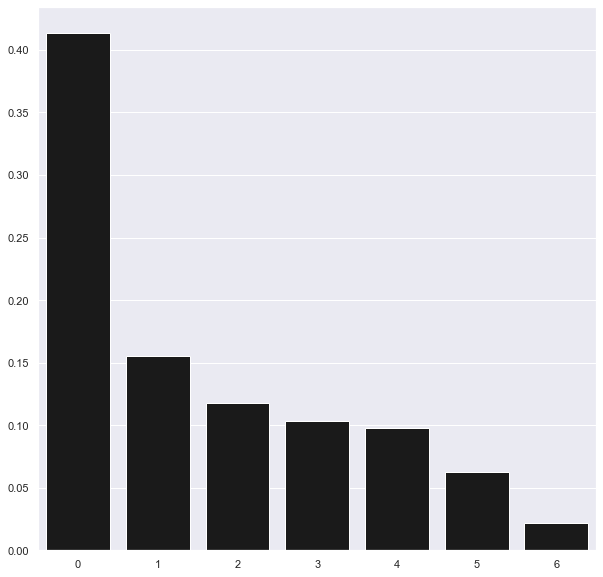

In [63]:
dr.icreamental_pca(df,Variance_bar = 'yes',n_components=7)

In [64]:
dr.sparse_pca(df)

Need only 2 components or Label Details to visualize the separation observation


0         1
0   -2.929444  0.068539
1    0.378944  0.757246
2   -0.327500  0.602952
3   -2.945643 -1.533012
4    0.978399  0.039606
5   -0.021251  1.890940
6   -0.144310  0.723585
7    2.274246  2.122783
8    2.900986  0.885721
9   -0.221118  0.541275
10   1.214002  0.810227
11   1.613908 -0.405286
12  -1.153415  1.099524
13   1.030385  0.632369
14   0.536410 -0.394101
15   3.074221 -0.508307
16   0.171392 -0.538888
17  -2.682901 -0.265881
18  -0.191279 -0.624954
19  -0.821877  0.250053
20   0.949835  1.099002
21  -0.907317 -0.325982
22   0.104094  2.244306
23   2.401822  0.089490
24   0.863806  0.104963
25  -3.122961  0.078617
26  -2.900556  0.517616
27  -0.607841 -0.756643
28  -2.810988  0.043596
29   2.486564  1.816814
30  -0.184530 -0.221492
31  -3.954788 -0.264181
32  -3.549764 -1.166078
33   0.913574  1.161925
34   0.028364  1.278851
35   0.091649  1.849570
36  -2.099024 -0.234877
37  -3.164929 -0.967831
38  -1.731250 -2.074580
39   0.903218  1.422575
40  -2.579331 -1.099846
41   1.112665  0.931390
42   2.128819  0.099746
43   2.009637 -0.319135
44   2.957700  0.935053
45  -0.250886  0.951543
46  -0.011697  1.106755
47  -0.860195  0.878870
48   0.060706  0.642181
49  -1.296787 -2.291379
50  -2.468426  0.670552
51   1.624399 -0.928997
52  -0.204031 -0.984312
53   2.416153  1.131188
54   2.214029  1.905031
55  -1.422442 -0.273250
56  -2.206449 -0.162404
57   0.304278  0.564006
58   2.629402  1.314430
59  -2.045940 -0.339289
60   1.747216  1.797392
61   0.130788  0.484657
62  -0.669044  0.652196
63  -2.949710 -0.691440
64  -2.815921  0.134016
65  -0.329033 -1.297619
66  -4.374521 -1.671512
67   1.811897 -1.209897
68   2.447109  0.656209
69  -1.337790  0.558623
70  -0.952696  0.740432
71  -0.008128  1.329200
72  -1.023903  0.281888
73   3.626250 -1.669334
74   1.464297  1.058595
75   2.137851  1.773758
76   0.014328  0.250693
77   2.237371  2.426445
78   0.156524 -0.525492
79  -0.291992  0.224114
80  -1.858128  0.183673
81  -1.227427 -0.351041
82   2.439937 -0.093256
83  -0.335425 -1.280686
84  -1.511736 -0.538069
85   1.177199 -0.146621
86   1.160988  0.262290
87  -1.781316 -2.009546
88  -1.751605 -1.047932
89   0.814468 -0.405784
90   1.399427 -0.722325
91   6.854781 -4.795384
92   0.730273  0.088355
93  -2.108660 -0.359868
94  -2.942950 -0.246319
95   1.225805 -1.599691
96   1.104807 -1.010857
97  -3.370069 -0.579500
98   3.653485 -4.717576
99  -1.923673 -1.413513
100  0.899712 -0.430393
101 -0.366207 -0.134222
102  0.515948 -0.200742
103 -0.921204 -0.611889
104  1.027660  0.222644
105 -0.219183  0.246307
106 -2.877651 -0.929353
107 -1.807077  1.548470
108 -1.018501 -1.032933
109 -1.279399  0.716510
110  3.360032 -0.162863
111  1.812057  1.507535
112 -3.398805 -1.012457
113 -4.837509 -0.127529
114  3.699968  1.358663
115  1.134498 -0.564065
116 -2.318752  0.403518
117  1.171491 -1.159659
118  0.136253 -0.422810
119 -0.001339  1.002685
120 -0.754777  0.027419
121  1.225831  0.583753
122  1.816407  1.360582
123  4.220821  0.104452
124  0.588978  0.554464
125  0.185251  0.956976
126 -1.639152  0.903157
127 -0.532764 -0.060981
128  0.872962  0.070830
129 -1.867468 -0.177073
130  0.849976  0.764921
131  1.613695 -2.970615
132 -3.318930  0.113042
133  5.755829 -6.672821
134  2.037914 -1.126421
135  2.285126 -0.284921
136 -0.767059 -1.394366
137 -1.149880  0.439613
138  1.928647  0.318079
139  2.028507  1.655328
140 -0.537552  0.846223
141  0.058262 -0.092857
142 -2.262378  0.615598
143  0.203423 -0.028288
144  2.823027  0.783270
145  4.081278  0.302740
146 -1.196231 -0.106008
147 -2.492245  0.074534
148  0.952848 -0.937615
149 -2.309457  0.987158
150 -1.939764 -1.072907
151 -0.709542 -0.045998
152  0.634436 -0.302742
153  0.435544  1.250726
154 -0.419911 -1.405323
155 -2.785060  0.187353
156  0.340583 -0.059144
157  2.444695 -1.294625
158  2.087803  1.366588
159  2.655774  2.798517
160  0.653186  1.256555
161 -0.801087  0.474082
162 -0.768151 -0.783344
163 -0.498339  0.991124
164  0.540023 -1.539188
165 -1.821155 -0.087542
166 

In [65]:
dr.TruncatedSVD(df,Variance_bar = 'yes',n_components=9)

Need only 2 components or Label Details to visualize the separation observation


0         1         2         3         4         5         6  \
0   -2.958742 -0.069228 -1.069441 -0.530017  1.613144  0.314560 -0.294601   
1    0.382716 -0.764844 -0.774705 -1.787886 -0.172816  0.618220  0.036419   
2   -0.330796 -0.608983  0.743649 -1.972958  0.226750  0.627952 -0.451689   
3   -2.975090  1.548361  1.027755 -1.295993  1.814397  0.280446 -0.600170   
4    0.988175 -0.040027 -0.688950 -1.729763  0.166961  0.265309 -0.250298   
5   -0.021499 -1.909849  0.546810 -1.094533  0.635283  1.390342 -0.054331   
6   -0.145772 -0.730838 -0.214456 -2.055402 -0.382343  0.368114  0.240645   
7    2.296952 -2.144030 -0.151702 -0.678018  1.816265 -0.233627 -0.196625   
8    2.929980 -0.894607 -0.836695 -0.376431  1.738200  0.557577  0.051867   
9   -0.223347 -0.546690  0.445790 -1.575729  0.495105  0.591572  0.589389   
10   1.226126 -0.818355 -0.857215 -1.060710  0.826329  0.060638  0.191015   
11   1.630042  0.409332  0.517476 -1.643812  0.822347  0.086184 -0.031801   
12  -1.164975 -1.110526  0.087032 -1.979391 -0.102397 -0.243792  0.274349   
13   1.040677 -0.638721 -1.021842 -1.224022  0.236377  0.396063 -0.052310   
14   0.541771  0.398029  0.084630 -1.646177 -0.184768  1.195645  0.514057   
15   3.104969  0.513357 -0.957393 -0.326074  1.558090  0.870189 -0.223555   
16   0.173108  0.544253 -0.703861 -1.714740 -0.140984  0.096201 -0.253033   
17  -2.709731  0.268537 -0.657868 -1.124495  1.152839 -0.982866 -0.414212   
18  -0.193188  0.631183 -0.676143 -1.576464 -0.177453  0.492446  0.012194   
19  -0.830108 -0.252561  0.016064 -1.538039  0.156256  0.155026 -0.284270   
20   0.959319 -1.110027 -1.754103 -0.716181 -0.207182  1.214895  0.114211   
21  -0.916388  0.329232 -0.866262 -0.559334  0.888348  0.662768  0.945551   
22   0.105099 -2.266760 -0.402174 -0.787926  0.346153  0.614103  0.291209   
23   2.425822 -0.090357  2.557963 -1.506933  1.835507 -0.530584  0.501473   
24   0.872439 -0.106037 -0.814576 -1.394872 -0.230459  0.332757  0.197751   
25  -3.154194 -0.079400 -0.716854 -0.302393  1.554970 -0.355835 -0.316524   
26  -2.929565 -0.522794 -1.440063  0.718109  1.761052  0.989127 -0.559478   
27  -0.613913  0.764190 -0.846027 -1.304206 -0.062412  0.187107  0.125596   
28  -2.839101 -0.044031 -0.651774 -0.727887  1.206489 -0.937621  0.040805   
29   2.511402 -1.835003 -0.562462  0.083205  1.584931  0.400464 -0.014729   
30  -0.186377  0.223687 -0.654029 -1.647008 -0.476466 -0.231560 -0.233015   
31  -3.994335  0.266831 -0.637230 -0.608776  1.591387 -1.420123  0.869467   
32  -3.585248  1.177748 -0.408214 -0.419395  1.778276 -0.835075 -0.467958   
33   0.922689 -1.173556 -0.081500 -0.912379  0.078285  0.684559 -0.172980   
34   0.028622 -1.291649  0.129388 -1.554013 -0.494773  0.040779  0.243081   
35   0.092536 -1.868079 -0.461547 -0.986134 -0.168321  0.148052 -0.044355   
36  -2.120014  0.237222 -0.608797 -0.889108  0.498446 -0.513763 -0.479024   
37  -3.196566  0.977522 -0.155614  0.288431  1.679896  0.920510 -0.614762   
38  -1.748543  2.095338  1.136965 -1.249968  0.590058  0.381073 -0.352432   
39   0.912230 -1.436822 -0.940519 -0.343852 -0.059230  1.162311 -0.333894   
40  -2.605112  1.110846 -0.497162 -0.491852  1.167735 -0.539908 -0.014457   
41   1.123776 -0.940723 -0.625308 -0.893388 -0.117062  0.123026  0.122134   
42   2.150100 -0.100760 -0.018851 -1.020061  0.314267 -0.137369  0.015586   
43   2.029736  0.322301 -0.785402 -0.819648  0.085482  0.189483  0.016497   
44   2.987264 -0.944424 -0.438677  0.489720  1.843261  0.373579 -0.034505   
45  -0.253412 -0.961067 -0.240636 -0.929730 -0.144614  0.000481 -0.158075   
46  -0.011832 -1.117833 -0.420448 -0.626105 -0.155665  0.541306 -0.388195   
47  -0.868815 -0.887656  0.366466 -1.091854 -0.175363 -0.100392 -0.170535   
48   0.061303 -0.648620 -0.756413 -0.901385 -0.535966  0.205480 -0.108448   
49  -1.309731  2.314323  1.531516 -0.151987  2.094990  0.380733 -0.005681   
50  -2.493127 -0.677245  0.583637 -1.047114  0.108260 -0.661175 -0.168653   
51   1.6